In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotting_utils import *

dir = "/home/shaohang/work_space/rl_ws/exp_data_processing/data_records" + '/'

## Car Action

In [10]:
def plot_car_action(experiment_map, action_type):
    names = ["time", "real_x", "real_y", "real_theta", "des_x", "des_y", "des_theta", "vel", "ang_vel"]
    fig, axs = plt.subplots(1, figsize=(16, 8))
    for alg in experiment_map:
        PATH = dir + experiment_map[alg] + ".csv"
        data_to_plot = pd.read_csv(PATH, header=0, names=names)
        ts = data_to_plot["time"].to_numpy()
        if action_type == 'vel':
            vel = data_to_plot["vel"].to_numpy()
            axs.plot(ts, vel, label=get_legend_name(alg), linewidth=3, color=get_color(alg))
            axs.set_ylabel("Velocity", fontsize=42)
        elif action_type == 'ang_vel':
            ang_vel = data_to_plot["ang_vel"].to_numpy()
            axs.plot(ts, ang_vel, label=get_legend_name(alg), linewidth=3, color=get_color(alg))
            axs.set_ylabel("Angular Velocity", fontsize=42)

        axs.legend(loc="upper right", fontsize=30, frameon=True)
        axs.set_xlabel("Time", fontsize=36) 
        axs.tick_params(axis="both", which="major", labelsize=24)
        
    fig.savefig(action_type + ".pdf", bbox_inches='tight', dpi=300)
    plt.show()

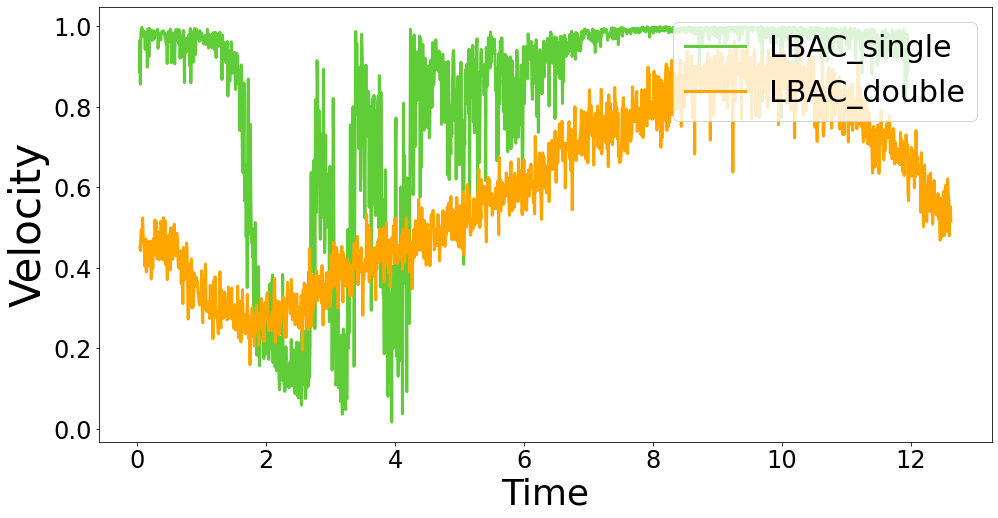

In [12]:
half_circle_exp_map = {"LBAC_single": "half_circle_singleV_500_2",
                        "LBAC_double": "half_circle_v5_300_2"}

plot_car_action(half_circle_exp_map, 'vel')


## Car Tracking Error

In [6]:
def plot_car_error(experiment_map):
    names = ["time", "real_x", "real_y", "real_theta", "des_x", "des_y", "des_theta"]
    fig_pos, axs_pos = plt.subplots(1, figsize=(16, 8))
    fig_theta, axs_theta = plt.subplots(1, figsize=(16, 8))
    for alg in experiment_map:
        PATH = dir + experiment_map[alg] + ".csv"
        data_to_plot = pd.read_csv(PATH, header=0, names=names)
        data_to_plot["x_error"] = data_to_plot["real_x"] - data_to_plot["des_x"]
        data_to_plot["y_error"] = data_to_plot["real_y"] - data_to_plot["des_y"]
        data_to_plot["position_error"] = np.sqrt(data_to_plot["x_error"]**2 + data_to_plot["y_error"]**2)
        data_to_plot["theta_error"] = data_to_plot["real_theta"] - data_to_plot["des_theta"]
        ts = data_to_plot["time"].to_numpy()
        position_error = data_to_plot["position_error"].to_numpy()
        theta_error = data_to_plot["theta_error"].to_numpy()
        axs_pos.plot(ts, position_error, label=get_legend_name(alg), linewidth=3, color=get_color(alg))
        axs_pos.axhline(1, color='red', linestyle='--')
        axs_theta.plot(ts, theta_error, label=get_legend_name(alg), linewidth=3, color=get_color(alg))

    axss = [axs_pos, axs_theta]
    ylabels = ["position error", "theta error"]
    for i in range(2):
        axs = axss[i] 
        axs.axhline(y=0, color='black', linestyle='--')
        axs.legend(loc="upper right", fontsize=30, frameon=False)
        axs.set_ylabel(ylabels[i], fontsize=42)
        axs.set_xlabel("time", fontsize=42)
        handles, labels = plt.gca().get_legend_handles_labels()
        order = [0, 2, 3, 1]
        axs.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc="upper left", fontsize=30, frameon=True)
        axs.tick_params(axis="both", which="major", labelsize=36)

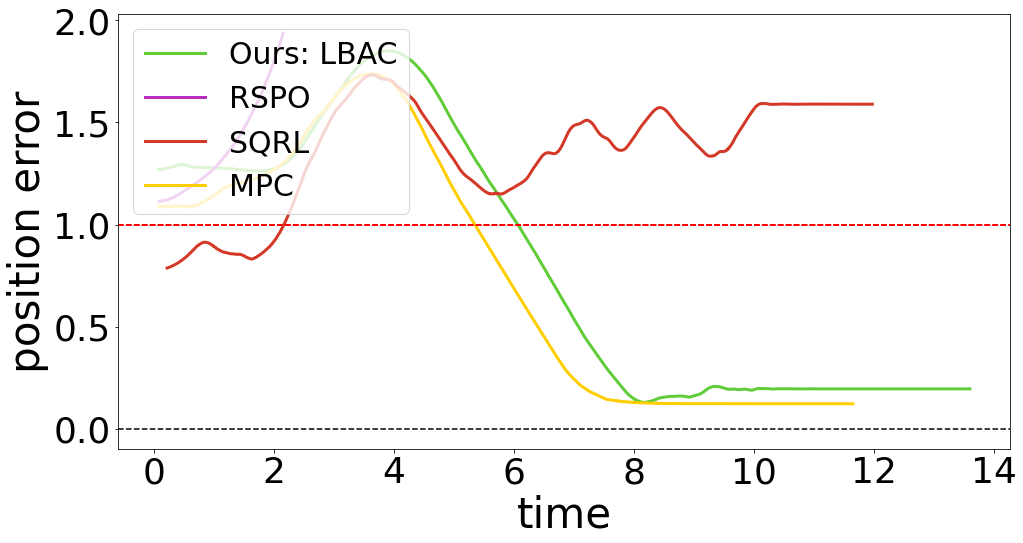

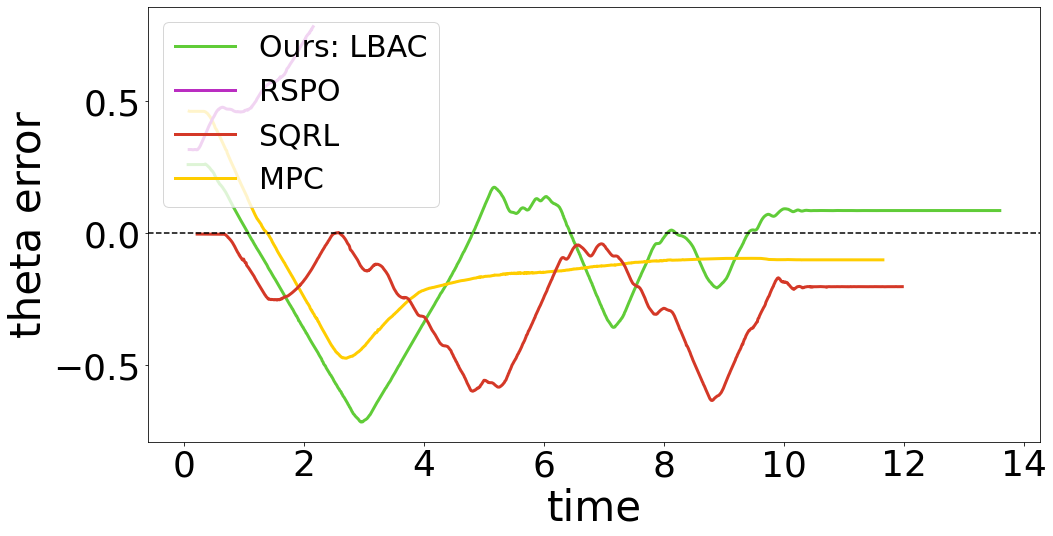

In [7]:
straight_line_exp_map = {"LBAC": "straight_line_LBAC",
                        "MPC": "straight_line_mpc",
                        "RSPO": "straight_line_RSPO_1_crash",
                        "SQRL": "straight_line_SQRL_2_timeout"}

plot_car_error(straight_line_exp_map)
plt.show()

In [ ]:
# half_circle_exp_map = {"LBAC": "half_circle_LBAC_fast_traj",
#                         "MPC": "half_circle_MPC_fast_traj",
#                         "RSPO": "half_circle_RSPO_fast_traj",
#                         "SQRL": "half_circle_SQRL_fast_traj"}

half_circle_exp_map = {"LBAC": "half_circle_LBAC",
                        "MPC": "half_circle_mpc_good_traj",
                        "RSPO": "half_circle_RSPO",
                        "SQRL": "half_circle_SQRL"}

plot_car_error(half_circle_exp_map)

## Car Trajectory

In [ ]:
def plot_car_traj(experiment_map, axs):
    names = ["time", "real_x", "real_y", "real_theta", "des_x", "des_y", "des_theta"]
    for alg in experiment_map:
        PATH = dir + experiment_map[alg] + ".csv"
        data_to_plot = pd.read_csv(PATH, header=0, names=names)
        real_x = data_to_plot["real_x"].to_numpy()
        real_y = data_to_plot["real_y"].to_numpy()
        axs.plot(real_x, real_y, label=alg)

    axs.legend(loc="upper right", fontsize=12, frameon=False)
    axs.set_ylabel("Y", fontsize=16)
    axs.set_xlabel("X", fontsize=16)

In [ ]:
fig, axs = plt.subplots(1, figsize=(8, 8))
plot_car_traj(straight_line_exp_map, axs)
axs.set_title("Real Trajectory: Straight Line", fontsize=20)
axs.axhline(0, color='black', linestyle='--')
axs.axvline(0, color='black', linestyle='--')
axs.set_ylim(-2, 2)
axs.set_xlim(-2.5, 2.5)
plt.show()

In [ ]:
fig, axs = plt.subplots(1, figsize=(8, 8))
plot_car_traj(half_circle_exp_map, axs)
axs.set_title("Real Trajectory: Half Circle", fontsize=20)
axs.axhline(0, color='black', linestyle='--')
axs.axvline(0, color='black', linestyle='--')
axs.set_ylim(-2, 2)
axs.set_xlim(-2, 2)
plt.show()

## Drone Trajectory

In [ ]:
def plot_drone_traj(experiment_map, axs):
    names = ["time", "cmd_vx", "cmd_vy", "real_x", "real_z", "real_vx", "real_vz"]
    for alg in experiment_map:
        for i in range(2):
            if i == 0:
                PATH = dir + experiment_map[alg] + ".csv"
            else:
                PATH = dir + experiment_map[alg] + "_2.csv"
            
            data_to_plot = pd.read_csv(PATH, header=0, names=names)
            real_x = data_to_plot["real_x"].to_numpy()
            real_z = data_to_plot["real_z"].to_numpy()
            axs.plot(real_x, real_z, label=alg)
            axs.plot(real_x[-1], real_z[-1], 'bo', markersize=12) # end point

    axs.legend(loc="upper left", fontsize=12, frameon=False)
    axs.set_ylabel("Y", fontsize=16)
    axs.set_xlabel("X", fontsize=16)
    axs.set_xlim(-2.2, 1.2)

In [ ]:
drone_exp_map_0dot35 = {"LBAC": "drone_LBAC_0dot35",
                        "RSPO": "drone_RSPO_0dot35",
                        "SQRL": "drone_SQRL_0dot35"}

drone_exp_map_0dot9 = {"LBAC": "drone_LBAC_0dot9",
                        "RSPO": "drone_RSPO_0dot9",
                        "SQRL": "drone_SQRL_0dot9"}

drone_exp_map_1dot3 = {"LBAC": "drone_LBAC_1dot3",
                        "RSPO": "drone_RSPO_1dot3",
                        "SQRL": "drone_SQRL_1dot3"}
point_0dot35 = np.array([-1.5, 0.35])
point_0dot75 = np.array([-1.5, 0.75])
point_1dot2 = np.array([-1.5, 1.2])

exps = {"Hight: 0.35m": (drone_exp_map_0dot35, point_0dot35)\
    , "Hight: 0.75m": (drone_exp_map_0dot9, point_0dot75), "Hight: 1.2m": (drone_exp_map_1dot3, point_1dot2)}



for name in exps:
    fig, axs = plt.subplots(1, figsize=(8, 8))
    plot_drone_traj(exps[name][0], axs)
    axs.set_title(name, fontsize=20)
    axs.plot(exps[name][1][0], exps[name][1][1], 'r*', markersize=24) # start point
    rectangle_lower = plt.Rectangle((-1, 0.1), 0.5, 0.9)
    rectangle_higher = plt.Rectangle((0, 1.3), 1, 0.5)
    ground = plt.Rectangle((-2, 0), 3, 0.2)
    plt.gca().add_patch(rectangle_lower)
    plt.gca().add_patch(rectangle_higher)
    plt.gca().add_patch(ground)
    plt.show()